# Introduction

Generative Adversarial Networks (GANs) have revolutionized the field of synthetic data generation, particularly for producing realistic images. In this project, we aim to explore GANs—specifically Deep Convolutional GANs (DCGANs) to generate diverse and realistic bird images. This technology has applications in areas such as wildlife conservation, ecological research, education, and creative content generation.

# Problem Statement
The objective of this project is to leverage GAN architectures to generate visually convincing bird images. By successfully training DCGAN and cGAN models, the project aims to address key challenges in data availability, species identification, and content creation. This research is particularly valuable for enriching datasets in conservation research and creating compelling visual content.

# Data Source and Collection Process

Our dataset is a preprocessed version of the Caltech-UCSD Birds 2000-2011 dataset, a comprehensive collection of bird images widely used for fine-grained visual recognition tasks. The data comes preprocessed already, and is split into train and test sets, each containing three files:


256images.pickle — High-resolution bird images with dimensions 256x256x3 for training models capable of generating fine details. 


64images.pickle — Low-resolution bird images with dimensions 64x64x3, suitable for faster model iteration and experimentation.

char-CNN-RNN-embeddings.pickle — Pre-trained text embeddings designed to encode descriptive captions, providing conditional inputs for text-to-image synthesis models.

# Loading Data

In [34]:
# RUN THIS ONCE SO THAT YOU HAVE THE FILES LOCALLY

# import gdown
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt

# # data uploaded to google drive
# train_cnn_rnn_embeddings = "1QpA_0GQtvl3VB3ae3cUxAvFfgWd_ioGz"
# train_256_images = "1Qy3oatCpCjUCoK16rHEE0Y8_WwztEtmc"
# train_64_images = "1jC5UkApo55aOb6mwC5atr9HgTMP0vscU"
# test_cnn_rnn_embeddings = "1AZl7hrbsdLC65bi2CI15lpkwEKp-AfEX"
# test_256_images = "1Oe5oC8ganf_Au5p_Vz0KfjDH5179TfL2"
# test_64_images = "1L8YQqIpEBt5n2ueyGgn9hbTQOe9vxZRI"

# def download_and_load_embeddings(file_id, file_name):
#     url = f"https://drive.google.com/uc?id={file_id}"
#     gdown.download(url, file_name, quiet=False)
#     with open(file_name, "rb") as f:
#         data = pickle.load(f, encoding="latin1")
#     return data
# def download_and_load_images(file_id, file_name):
#     url = f"https://drive.google.com/uc?id={file_id}"
#     gdown.download(url, file_name, quiet=False)
#     with open(file_name, "rb") as f:
#         data = pickle.load(f)
#     return data

# train_embeddings_data = download_and_load_embeddings(train_cnn_rnn_embeddings, "train-CNN-RNN-embeddings.pkl")
# test_embeddings_data = download_and_load_embeddings(test_cnn_rnn_embeddings, "test-CNN-RNN-embeddings.pkl")
# train_256_images_data = download_and_load_images(train_256_images, "train_256_images.pkl")
# test_256_images_data = download_and_load_images(test_256_images, "test_256_images.pkl")
# train_64_images_data = download_and_load_images(train_64_images, "train_64_images.pkl")
# test_64_images_data = download_and_load_images(test_64_images, "test_64_images.pkl")

In [35]:
# might have to configure path to whatever path you have
import pickle
import gdown
import numpy as np
import matplotlib.pyplot as plt
with open("./train-CNN-RNN-embeddings.pkl", "rb") as f:
    train_embeddings_data = pickle.load(f, encoding="latin1")

with open("./test-CNN-RNN-embeddings.pkl", "rb") as f:
    test_embeddings_data = pickle.load(f, encoding="latin1")

with open("./train_256_images.pkl", "rb") as f:
    train_256_images_data = pickle.load(f)

with open("./test_256_images.pkl", "rb") as f:
    test_256_images_data = pickle.load(f)

with open("./train_64_images.pkl", "rb") as f:
    train_64_images_data = pickle.load(f)

with open("./test_64_images.pkl", "rb") as f:
    test_64_images_data = pickle.load(f)

# Data Overview/Handling Missing Values

All the data seems to be in order according to the kaggle description. We see that there are no duplicates or missing data, and it is in the correct shape as well. We got exactly what we expected, 64x64x3 and 256x256x3 images. The following code examines the dataset to come to this conclusion.

In [36]:
# checking type of data
print(type(train_embeddings_data))
print(type(train_256_images_data))
print(type(train_64_images_data))
print(type(test_embeddings_data))
print(type(test_256_images_data))
print(type(test_64_images_data))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [37]:
# check if shapes correct as labelled on kaggle
print(f"Train embeddings shape: {np.array(train_embeddings_data).shape}")
print(f"Test embeddings shape: {np.array(test_embeddings_data).shape}")
print(f"Train 256 images shape: {np.array(train_256_images_data).shape}")
print(f"Test 256 images shape: {np.array(test_256_images_data).shape}")
print(f"Train 64 images shape: {np.array(train_64_images_data).shape}")
print(f"Test 64 images shape: {np.array(test_64_images_data).shape}")

Train embeddings shape: (8855, 10, 1024)
Test embeddings shape: (2933, 10, 1024)
Train 256 images shape: (8855, 256, 256, 3)
Test 256 images shape: (2933, 256, 256, 3)
Train 64 images shape: (8855, 64, 64, 3)
Test 64 images shape: (2933, 64, 64, 3)


In [38]:
# check for missing values
def check_missing_values(data, name):
    if isinstance(data, np.ndarray):
        print(f"{name} - Missing Values: {np.isnan(data).sum()}")
    else:
        print(f"{name} - Missing Values: {sum(x is None for x in data)}")

check_missing_values(train_embeddings_data, "Train Embeddings")
check_missing_values(test_embeddings_data, "Test Embeddings")
check_missing_values(train_256_images_data, "Train 256 Images")
check_missing_values(test_256_images_data, "Test 256 Images")
check_missing_values(train_64_images_data, "Train 64 Images")
check_missing_values(test_64_images_data, "Test 64 Images")

Train Embeddings - Missing Values: 0
Test Embeddings - Missing Values: 0
Train 256 Images - Missing Values: 0
Test 256 Images - Missing Values: 0
Train 64 Images - Missing Values: 0
Test 64 Images - Missing Values: 0


In [39]:
# seeing if any duplicates
def check_duplicates(data, name):
    try:
        if isinstance(data, np.ndarray):
            print(f"{name} - Duplicate Entries: {len(data) - len(np.unique(data, axis=0))}")
        else:
            print(f"{name} - Duplicate Entries: {len(data) - len([tuple(row) for row in data])}")
    except Exception as e:
        print(f"Error checking duplicates in {name}: {e}")

check_duplicates(train_embeddings_data, "Train Embeddings")
check_duplicates(test_embeddings_data, "Test Embeddings")
check_duplicates(train_256_images_data, "Train 256 Images")
check_duplicates(test_256_images_data, "Test 256 Images")
check_duplicates(train_64_images_data, "Train 64 Images")
check_duplicates(test_64_images_data, "Test 64 Images")

Train Embeddings - Duplicate Entries: 0
Test Embeddings - Duplicate Entries: 0
Train 256 Images - Duplicate Entries: 0
Test 256 Images - Duplicate Entries: 0
Train 64 Images - Duplicate Entries: 0
Test 64 Images - Duplicate Entries: 0


# Bias & Fairness / Representativeness
We need to check for bias and fairness in our dataset. In the context of our dataset, we have unlabelled images of birds, so we don't have a way to check the classes of birds. So let's focus on the images themselves. One way we can do that is by just checking pixel colors to see if we have any concerns. Looking at the graph produced below by randomly selecting 1000 images, we see that blue is the dominating color in number of pixels even though the kernel density estiatmion line seems to be higher for red. Overrall, we don't see too much concern and have a good distribution of number of pixels per color. 

There could still be potential biases in the distribution of bird species, poses, environments, etc. We should check for a diverse set of bird species, as well as poses environments, and much else. 
We need to check if the data represents different subgroups well. We can simply do the eye test to see if there are different birds with different poses, environments, and bird species. The more complicated way would to be to somehow use a pretrained classifier to label our unlabeled dataset, but we will go the easy route and do an eye test. You can modify the parameters to check more samples, but of course it'll be more computiontally expensive. 

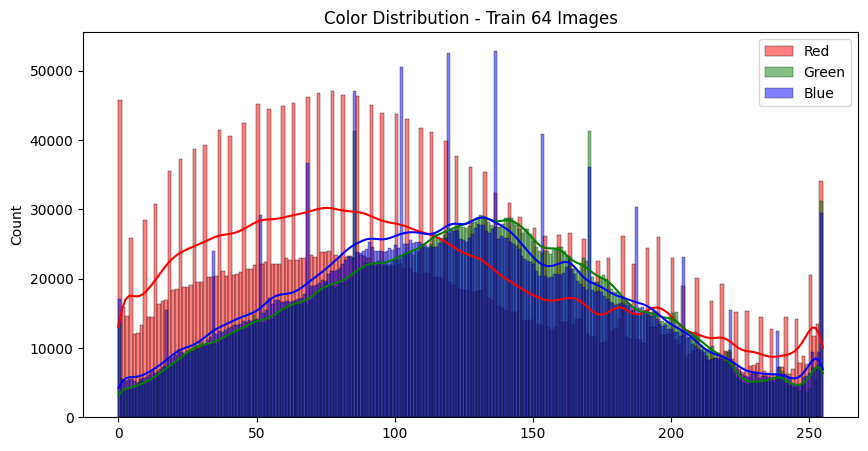

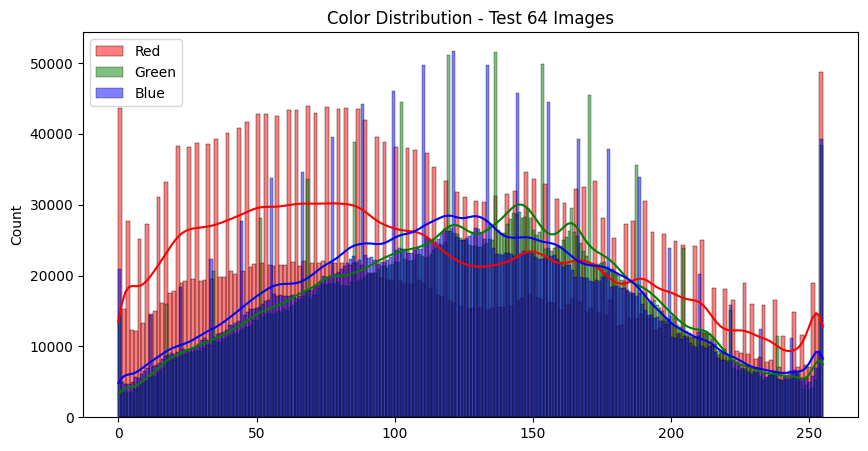

In [40]:
import numpy as np
import random
import seaborn as sns

train_64_images_data = np.array(train_64_images_data)
test_64_images_data = np.array(test_64_images_data)

def sample_images(images, sample_size=1000):
    indices = random.sample(range(images.shape[0]), sample_size)
    return images[indices]

train_sampled_images = sample_images(train_64_images_data, 1000)
test_sampled_images = sample_images(test_64_images_data, 1000)

def plot_color_distribution(images, name):
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        sns.histplot(images[:, :, :, i].flatten(), color=color.lower(), kde=True, label=color)
    plt.legend()
    plt.title(f'Color Distribution - {name}')
    plt.show()

plot_color_distribution(train_sampled_images, "Train 64 Images")
plot_color_distribution(test_sampled_images, "Test 64 Images")

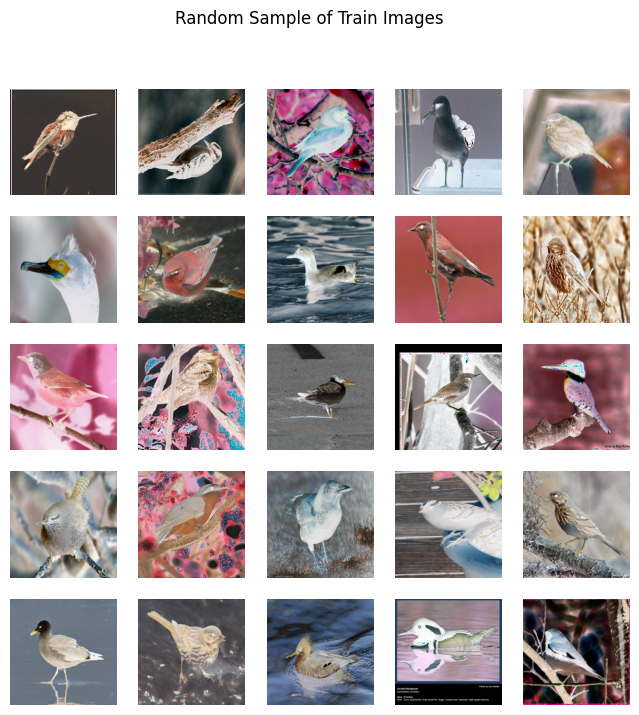

In [ ]:
# visual representation of above, eye test, default 5x5 can call bigger but more expensive
def show_random_image_grid(images, title, rows=5, cols=5, sample_size=50):
    # Randomly select a subset of images
    selected_indices = np.random.choice(images.shape[0], sample_size, replace=False)
    sampled_images = images[selected_indices]
    
    # Plot the selected images
    plt.figure(figsize=(8, 8))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow((sampled_images[i] * 255).astype(np.uint8)) 
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

train_256_images_data = np.array(train_256_images_data)

show_random_image_grid(train_256_images_data, "Random Sample of Train Images")

# Preprocessing

In [ ]:
# Will most likely normalize, we have no missing values or any outliers.
# Normalize the images from [0, 255] to [-1, 1]
# train_256_images_data = (train_256_images_data / 127.5) - 1
# test_256_images_data = (test_256_images_data / 127.5) - 1

# Privacy Considerations
Our data is of bird images, so we don't really have any privacy concerns. We just need to make sure that the images are accurate, and that the images only contain the bird in an environments that aren't identifiable  or even make sure they don't contain identifiable people. The images don't come with any metadata as well, there should be no tags to an image that can link it to any location or entity.

# Labeling Consistency
Since our dataset does not have labels we don't have any concerns for labeling consistency. 

# CheckList

1. Does the data include information that can predict the target? 
Even though we have no labels, we have a lot of implicit information from the image itself. These textures, shapes, colors, etc. can be learned by our model to generate new bird images. 

2. Does the granularity of training and prediction match? Yes, both the training and prediction are happening at the same level of detail, image pixels. The model learns from pixel information in the training phase, and when it generates images, it creates new images at the same pixel level. So, the granularity during training and prediction is the same.

3. Do you already have labeled data (that is, training examples)? No, but we are planning to do unsupervised learning.

4. Is your data correct/accurate? Yes, see above.

5. Do you have enough data? Yes, we have about 11000 images of birds which should be enough for our DCGAN.

6. Is the data easily accessible by the team and machines performing the ML? Yes, even though it comes in pk1 format, we have sucessfully converted it back to Python objects and have put it on our local machines. There's also an option for loading it through a google drive link, but that takes more time but you only have to run that once and then it'll be downloaded to your PC locally.

7. Can you read the data fast enough? We'll have to see more later, but so far it hasn't been too bad having it locally.

8. Do you have documentation for each field of data? Yes, see specifications above.

9. Are the missing values a small percentage of the fields of interest? We have no missing values.

10. If your data is periodic, do you have data for 3 ✕ period? N/A Not a forecasting problem

11. If you want to forecast n periods in advance, do you have n + 2 periods of data? N/A Not a forecasting problem

12. Do you know the timestamp at which each data value was obtained or updated? N/A Not a forecasting problem

13. Is your data unbiased? Yes, see above.

14. If there are missing values, do you know the causes? No missing values

15. If there are missing values, do they occur at random? No missing values

16. For each field (input or target), does the data have the same unit? Yes, we checked the shape.

17. For each field (input or target), is the meaning of the data consistent? Yes, the shape of our input data is consistent with what we expect, 64x64x3 and 256x256x3.

18. Is the same value recorded in the same way everywhere? Yes, see above.

19. Integrate data from diverse input sources. We have a test and training set.

20. If your data is scattered, identify and consolidate it. We have the 64x64x3 and 256x256x3 images separated.

21. Identify and impute missing values. No missing values

22. Remove all sources of noise from your data. We will experiment and see later when model is trained.

23. Create new features that improve predicting the target. N/A Not classification

24. Look for new sources of information to complement your data. Potentially

25. Identify and remove all sources of data leakage. Yes, we will not use the testing to train the model.

26. Integrate all the features of an instance into one object. Yes, our features come in a list or vector.

27. Convert data to formats that can be read fast for training the ML model. Yes, we need to make sure it's compatible with PyTorch/Tensorflow.

28. For a forecasting problem, build a pipeline to easily re-create a snapshot of the data at an arbitrary time in the past. N/A Not forecasting problem

29. Implement data quality tests. See above

